In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.svm import SVC
import seaborn as sns
import pickle
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()
data_df = pd.read_csv('./Dataset/Processed/result.csv')
data_df

,X23,Y23,Z23,X24,Y24,Z24,X25,Y25,Z25,X26,...,Z26,X27,Y27,Z27,X28,Y28,Z28,rad1,rad2,label
0,-0.050611,0.328414,0.377665,-0.062408,0.346747,0.082647,0.075673,0.321555,0.452509,-0.107053,...,-0.066724,0.055469,0.544697,0.606251,-0.261114,0.545635,0.020681,1.426239,1.662554,0
1,-0.021964,0.365163,0.165702,-0.051814,0.396390,-0.087872,0.090013,0.330854,0.203207,-0.086385,...,-0.220727,0.075883,0.554291,0.281841,-0.236949,0.544779,-0.093182,1.210328,1.311982,0
2,0.006377,0.382020,0.258012,-0.037193,0.413299,-0.030466,0.134718,0.341158,0.301251,-0.085413,...,-0.161273,0.112457,0.563660,0.344135,-0.250325,0.558230,0.011013,1.162841,1.466268,0
3,-0.080506,0.339088,0.219121,-0.061865,0.348102,-0.041165,-0.145484,0.501069,0.237628,0.072883,...,0.027637,-0.286278,0.526417,0.236553,0.041353,0.592056,0.134638,2.130419,1.725693,0
4,-0.072500,0.362080,0.059596,-0.060695,0.366196,-0.206889,-0.165013,0.543803,0.011529,0.071912,...,-0.115190,-0.312405,0.526008,-0.043720,0.030929,0.579707,0.019686,1.921531,1.270300,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
814,0.054317,0.296052,-0.001171,0.072144,0.294581,0.257917,0.099064,0.453401,0.041872,0.104579,...,0.288179,0.136807,0.620888,0.144204,0.142479,0.621656,0.385131,3.086172,3.126139,2
815,-0.004015,0.364716,0.301235,-0.007031,0.364970,0.006447,0.001444,0.547032,0.396887,0.002110,...,0.101253,-0.012297,0.754203,0.549641,-0.000791,0.767771,0.296777,3.045433,3.080125,2
816,0.045740,0.369820,0.013032,0.063313,0.369844,0.302819,0.056700,0.570708,0.094829,0.060535,...,0.357556,0.076397,0.787347,0.244512,0.073907,0.774832,0.500191,3.105426,3.063973,2
817,-0.013514,0.261614,0.230968,-0.016532,0.263394,0.010546,-0.011681,0.390349,0.306236,-0.013802,...,0.054350,-0.023969,0.519781,0.404739,-0.021839,0.554147,0.140108,3.032701,3.067121,2


In [15]:
print(data_df['label'].value_counts())
print(f"Duplicate Count : {data_df.duplicated().sum()}")
print(f"NA Count :\n{data_df.isna().sum()}")
display(data_df.head(3))

label
2    280
1    279
0    260
Name: count, dtype: int64
Duplicate Count : 0
NA Count :
X23      0
Y23      0
Z23      0
X24      0
Y24      0
Z24      0
X25      0
Y25      0
Z25      0
X26      0
Y26      0
Z26      0
X27      0
Y27      0
Z27      0
X28      0
Y28      0
Z28      0
rad1     0
rad2     0
label    0
dtype: int64


,X23,Y23,Z23,X24,Y24,Z24,X25,Y25,Z25,X26,...,Z26,X27,Y27,Z27,X28,Y28,Z28,rad1,rad2,label
0,-0.050611,0.328414,0.377665,-0.062408,0.346747,0.082647,0.075673,0.321555,0.452509,-0.107053,...,-0.066724,0.055469,0.544697,0.606251,-0.261114,0.545635,0.020681,1.426239,1.662554,0
1,-0.021964,0.365163,0.165702,-0.051814,0.396390,-0.087872,0.090013,0.330854,0.203207,-0.086385,...,-0.220727,0.075883,0.554291,0.281841,-0.236949,0.544779,-0.093182,1.210328,1.311982,0
2,0.006377,0.382020,0.258012,-0.037193,0.413299,-0.030466,0.134718,0.341158,0.301251,-0.085413,...,-0.161273,0.112457,0.563660,0.344135,-0.250325,0.558230,0.011013,1.162841,1.466268,0


In [16]:
columns = list(data_df.columns)
print(columns)

['X23', 'Y23', 'Z23', 'X24', 'Y24', 'Z24', 'X25', 'Y25', 'Z25', 'X26', 'Y26', 'Z26', 'X27', 'Y27', 'Z27', 'X28', 'Y28', 'Z28', 'rad1', 'rad2', 'label']


In [17]:
# Check Outlier Count
selected_cols = columns[:-3]
total_count = 0 
for i in selected_cols:
  q1 = data_df[i].quantile(0.25)
  q3 = data_df[i].quantile(0.75)
  iqr = q3-q1
  low = q1 - iqr*1.5
  high = q3 + iqr*1.5
  print("==================")
  print(i)
  lowCount = data_df.loc[data_df[i] < low,i].count()
  highCount = data_df.loc[data_df[i] > high,i].count()
  # print(df.loc[df[i] < low,i].index)
  # print(df.loc[df[i] > high,i].index)
  print('low bound', lowCount)
  print('high bound',highCount)
  print('total', lowCount + highCount)
  total_count+=lowCount+highCount

print("==================\nTotal : "+str(total_count))

X23
low bound 0
high bound 0
total 0
Y23
low bound 1
high bound 4
total 5
Z23
low bound 0
high bound 0
total 0
X24
low bound 0
high bound 1
total 1
Y24
low bound 0
high bound 1
total 1
Z24
low bound 1
high bound 0
total 1
X25
low bound 9
high bound 7
total 16
Y25
low bound 1
high bound 14
total 15
Z25
low bound 0
high bound 0
total 0
X26
low bound 2
high bound 8
total 10
Y26
low bound 0
high bound 12
total 12
Z26
low bound 0
high bound 0
total 0
X27
low bound 14
high bound 1
total 15
Y27
low bound 0
high bound 2
total 2
Z27
low bound 0
high bound 2
total 2
X28
low bound 0
high bound 10
total 10
Y28
low bound 0
high bound 0
total 0
Z28
low bound 0
high bound 2
total 2
Total : 92


In [18]:
for col in selected_cols:
    q1 = data_df[col].quantile(0.25)
    q3 = data_df[col].quantile(0.75)
    iqr = q3 - q1
    low = q1 - iqr*1.5
    high = q3 + iqr * 1.5

    outliers_index = data_df[data_df[col] > high].index
    data_df = data_df.drop(outliers_index)
    outliers_index = data_df[data_df[col] < low].index
    data_df = data_df.drop(outliers_index)

In [19]:
data_df = data_df.reset_index(drop=True)
print(data_df['label'].value_counts())
display(data_df)

label
2    272
1    244
0    232
Name: count, dtype: int64


,X23,Y23,Z23,X24,Y24,Z24,X25,Y25,Z25,X26,...,Z26,X27,Y27,Z27,X28,Y28,Z28,rad1,rad2,label
0,-0.050611,0.328414,0.377665,-0.062408,0.346747,0.082647,0.075673,0.321555,0.452509,-0.107053,...,-0.066724,0.055469,0.544697,0.606251,-0.261114,0.545635,0.020681,1.426239,1.662554,0
1,-0.021964,0.365163,0.165702,-0.051814,0.396390,-0.087872,0.090013,0.330854,0.203207,-0.086385,...,-0.220727,0.075883,0.554291,0.281841,-0.236949,0.544779,-0.093182,1.210328,1.311982,0
2,0.006377,0.382020,0.258012,-0.037193,0.413299,-0.030466,0.134718,0.341158,0.301251,-0.085413,...,-0.161273,0.112457,0.563660,0.344135,-0.250325,0.558230,0.011013,1.162841,1.466268,0
3,-0.080506,0.339088,0.219121,-0.061865,0.348102,-0.041165,-0.145484,0.501069,0.237628,0.072883,...,0.027637,-0.286278,0.526417,0.236553,0.041353,0.592056,0.134638,2.130419,1.725693,0
4,-0.072500,0.362080,0.059596,-0.060695,0.366196,-0.206889,-0.165013,0.543803,0.011529,0.071912,...,-0.115190,-0.312405,0.526008,-0.043720,0.030929,0.579707,0.019686,1.921531,1.270300,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
743,0.054317,0.296052,-0.001171,0.072144,0.294581,0.257917,0.099064,0.453401,0.041872,0.104579,...,0.288179,0.136807,0.620888,0.144204,0.142479,0.621656,0.385131,3.086172,3.126139,2
744,-0.004015,0.364716,0.301235,-0.007031,0.364970,0.006447,0.001444,0.547032,0.396887,0.002110,...,0.101253,-0.012297,0.754203,0.549641,-0.000791,0.767771,0.296777,3.045433,3.080125,2
745,0.045740,0.369820,0.013032,0.063313,0.369844,0.302819,0.056700,0.570708,0.094829,0.060535,...,0.357556,0.076397,0.787347,0.244512,0.073907,0.774832,0.500191,3.105426,3.063973,2
746,-0.013514,0.261614,0.230968,-0.016532,0.263394,0.010546,-0.011681,0.390349,0.306236,-0.013802,...,0.054350,-0.023969,0.519781,0.404739,-0.021839,0.554147,0.140108,3.032701,3.067121,2


In [20]:

X = data_df.drop('label', axis=1)
y = data_df['label']

X = scaler.fit_transform(X)
display(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

smt = SMOTE()

cv = KFold(n_splits=5, shuffle=True, random_state=42)
svm = SVC()

pipeline = Pipeline([('smt',smt), ('svm',svm)])

param_grid = {
    'svm__C': [0.1, 1, 10, 100,1000],
    'svm__gamma': [1, 0.1, 0.01, 0.001,0.0001],
    'svm__degree': [2, 3, 4, 5],
    'svm__kernel': ['linear', 'rbf', 'poly']
}

grid = GridSearchCV(pipeline,param_grid=param_grid, cv = cv, scoring='accuracy')
print("Training...")
grid.fit(X_train,y_train)

array([[-0.81655263,  0.36425209,  1.56835468, ..., -0.69740442,
        -1.59303583, -1.2449257 ],
       [-0.42572441,  1.17250468,  0.36368641, ..., -1.19342328,
        -1.92428285, -1.7775494 ],
       [-0.03906746,  1.54324237,  0.88832114, ..., -0.73952026,
        -1.99713783, -1.54314364],
       ...,
       [ 0.49797487,  1.27492229, -0.50399964, ...,  1.39147725,
         0.98314634,  0.88425091],
       [-0.31043887, -1.10490558,  0.73461615, ..., -0.17714794,
         0.87157372,  0.88903249],
       [ 0.32088789, -1.38576682, -0.35539916, ...,  0.17336876,
         0.97694353,  0.99458198]])

Training...


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('smt', SMOTE()), ('svm', SVC())]),
             param_grid={'svm__C': [0.1, 1, 10, 100, 1000],
                         'svm__degree': [2, 3, 4, 5],
                         'svm__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'svm__kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [21]:
best_model = grid.best_estimator_
y_pred_train = best_model.predict(X_train)
y_pred = best_model.predict(X_test)

print(f"Best parameters : {grid.best_params_}")
print(f"Best cross-validation score: {grid.best_score_}")

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred))

Best parameters : {'svm__C': 100, 'svm__degree': 5, 'svm__gamma': 0.01, 'svm__kernel': 'rbf'}
Best cross-validation score: 0.9554361567635905
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       177
           1       0.99      0.95      0.97       179
           2       0.96      1.00      0.98       205

    accuracy                           0.98       561
   macro avg       0.98      0.98      0.98       561
weighted avg       0.98      0.98      0.98       561

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        55
           1       1.00      0.89      0.94        65
           2       0.94      1.00      0.97        67

    accuracy                           0.96       187
   macro avg       0.96      0.96      0.96       187
weighted avg       0.96      0.96      0.96       187



[[55  3  0]
 [ 0 58  0]
 [ 0  4 67]]


<Axes: >

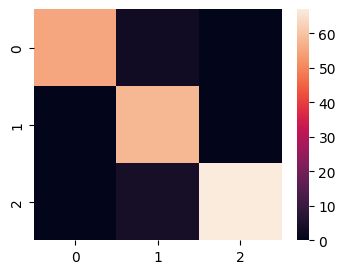

In [22]:
conf_matrix = confusion_matrix(y_pred, y_test)
print(conf_matrix)
plt.figure(figsize=(4,3))
sns.heatmap(conf_matrix)

In [23]:
model_filename = './Model/svm.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(best_model, file)

In [24]:
scaler_filename = './Model/scaler.pkl'
with open(scaler_filename, 'wb') as file:
    pickle.dump(scaler, file)